# Data Scraping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [2]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from tqdm import tqdm

p = 1
data = []
bar = tqdm(total=11000)

while True:
    mc_url = 'https://markets.businessinsider.com/news/aapl-stock?p=' + str(p)
    req = Request(url=mc_url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html.parser')
    article_divs = html.find_all('div', class_='latest-news__story')
    articles = []

    for div in article_divs:
        title_tag = div.find('a', class_='news-link')
        if title_tag:
            title = title_tag.get_text(strip=True)

        datetime_tag = div.find('time', class_='latest-news__date')
        if datetime_tag:
            datetime = datetime_tag['datetime']

        articles.append({"title": title, "datetime": datetime})

    data += articles
    bar.update(len(articles))

    if len(data) > 12000:
        break

    p += 1

bar.close()


12050it [04:42, 42.64it/s]


In [3]:
aapl_news_df = pd.DataFrame(data)
aapl_news_df

,title,datetime
0,Rag to Riches: 3 AR Stocks That Could Make Ear...,6/19/2024 2:25:11 PM
1,3 Metaverse Stocks to Buy Now: June 2024,6/19/2024 11:14:00 AM
2,3 Tech Stocks the Market Mispriced (And How Yo...,6/19/2024 10:30:00 AM
3,3 EV Stocks to Buy Now for the Rivian Resurgence,6/19/2024 10:15:00 AM
4,3 Transportation Stocks to Buy Now: June 2024,6/19/2024 10:12:00 AM
...,...,...
12045,Apple buys self-driving car startup Drive.ai,6/26/2019 3:33:57 AM
12046,Apple reportedly acquires self-driving car sta...,6/26/2019 1:27:05 AM
12047,Tuesday Apple Rumors: Apple Sends Out watchOS ...,6/25/2019 5:43:06 PM
12048,The new iPod touch is a nostalgic nod to the p...,6/25/2019 5:30:06 PM


In [ ]:
aapl_news_df['datetime'] = pd.to_datetime(aapl_news_df['datetime'])
aapl_news_df['date'] = aapl_news_df['datetime'].dt.date
# aapl_news_df['year'] = aapl_news_df['datetime'].dt.year
aapl_news_df.drop('datetime', axis = 1, inplace = True)
print(aapl_news_df)

In [6]:
aapl_news_df

,title,date
0,Rag to Riches: 3 AR Stocks That Could Make Ear...,2024-06-19
1,3 Metaverse Stocks to Buy Now: June 2024,2024-06-19
2,3 Tech Stocks the Market Mispriced (And How Yo...,2024-06-19
3,3 EV Stocks to Buy Now for the Rivian Resurgence,2024-06-19
4,3 Transportation Stocks to Buy Now: June 2024,2024-06-19
...,...,...
12045,Apple buys self-driving car startup Drive.ai,2019-06-26
12046,Apple reportedly acquires self-driving car sta...,2019-06-26
12047,Tuesday Apple Rumors: Apple Sends Out watchOS ...,2019-06-25
12048,The new iPod touch is a nostalgic nod to the p...,2019-06-25


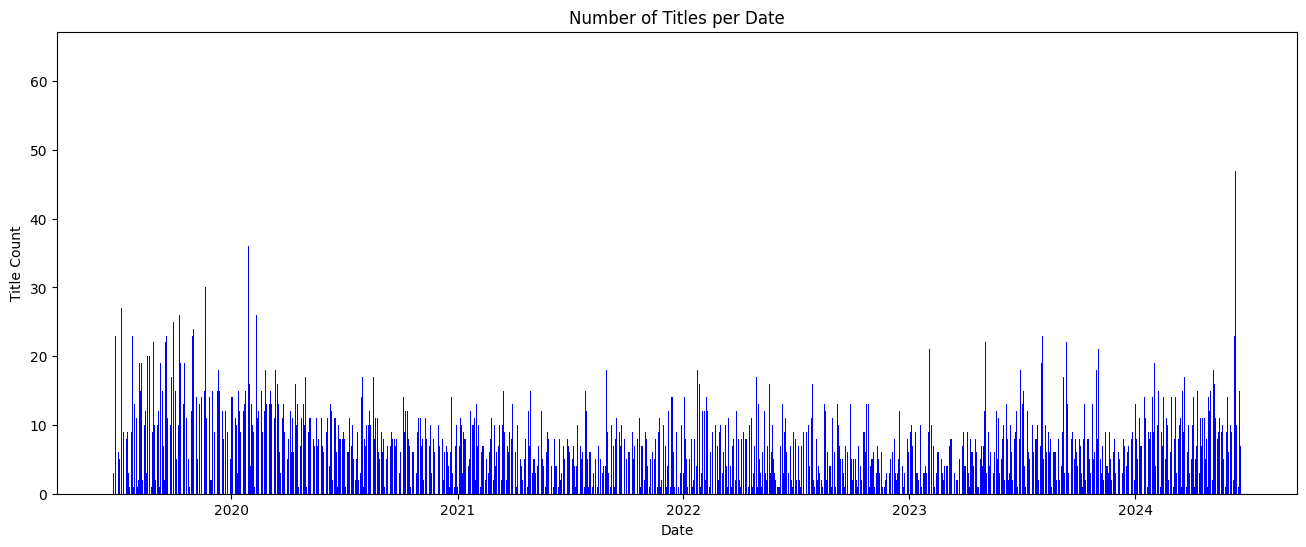

In [7]:
date_counts_df = aapl_news_df.groupby('date').size().reset_index(name='title_count')
# print(date_counts_df)
plt.figure(figsize=(16, 6))
plt.bar(date_counts_df['date'], date_counts_df['title_count'], color='b')
plt.xlabel('Date')
plt.ylabel('Title Count')
plt.title('Number of Titles per Date')
plt.show()

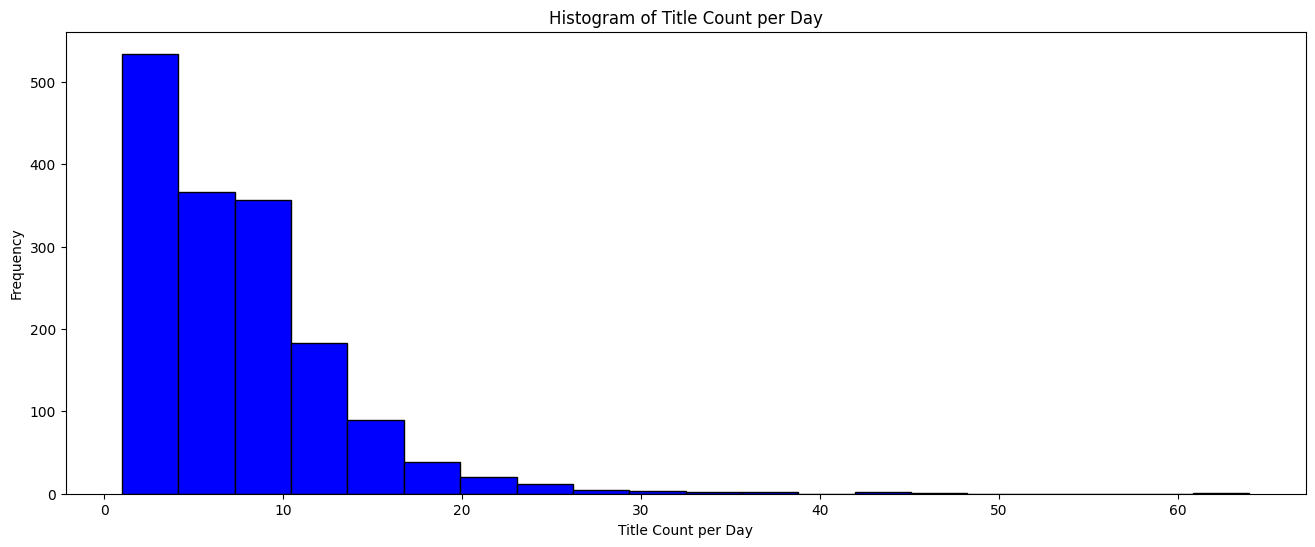

In [11]:
plt.figure(figsize=(16, 6))
plt.hist(date_counts_df['title_count'], bins=20, color='b', edgecolor='black')
plt.xlabel('Title Count per Day')
plt.ylabel('Frequency')
plt.title('Histogram of Title Count per Day')
plt.show()

In [ ]:
aapl_news_df.to_csv('aapl_news.csv')
aapl_stock_df.to_csv('aapl_stock.csv')

In [21]:
import yfinance as yf
aapl_stock_df = yf.Ticker("AAPL")
aapl_stock_df = aapl_stock_df.history(start="2020-01-01")
# aapl_stock_df['Close-Open']=aapl_stock_df['Close']-aapl_stock_df['Open']
# aapl_stock_df['Label']=(aapl_stock_df['Close-Open'] > 0).astype(int)
aapl_stock_df['date'] = aapl_stock_df.index.date
aapl_stock_df.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
aapl_stock_df.reset_index(drop=True, inplace=True)
aapl_stock_df

,Open,High,Low,Close,Volume,date
0,72.059666,73.120230,71.804259,73.059418,135480400,2020-01-02
1,72.281020,73.115357,72.122910,72.349129,146322800,2020-01-03
2,71.463731,72.964564,71.210751,72.925644,118387200,2020-01-06
3,72.935361,73.193203,72.361301,72.582657,108872000,2020-01-07
4,72.283446,74.054288,72.283446,73.750229,132079200,2020-01-08
...,...,...,...,...,...,...
1118,207.369995,220.199997,206.899994,213.070007,198134300,2024-06-12
1119,214.740005,216.750000,211.600006,214.240005,97862700,2024-06-13
1120,213.850006,215.169998,211.300003,212.490005,70122700,2024-06-14
1121,213.369995,218.949997,212.720001,216.669998,93728300,2024-06-17


# Sentiment Analysis

In [12]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889441728591919}]


In [14]:
from tqdm import tqdm
import pandas as pd

# Initialize the tqdm progress bar for the apply function
tqdm.pandas()

# Define the function to extract sentiment and score
def extract_sentiment_and_score(title):
    result = nlp(title)[0]
    return pd.Series({'sentiment': result['label'], 'score': result['score']})

# Apply the function to the 'title' column and assign the results to new columns
aapl_news_df[['sentiment', 'score']] = aapl_news_df['title'].progress_apply(extract_sentiment_and_score)

# Display the first few rows of the updated DataFrame
print(aapl_news_df.head())

  2%|▏         | 242/12050 [00:42<34:29,  5.71it/s]


KeyboardInterrupt: 

In [ ]:
aapl_news_df.to_csv('aapl_features.csv')

In [15]:
from google.colab import files
uploaded = files.upload()
aapl_news_df = pd.read_csv('aapl_features.csv')

Saving aapl_features.csv to aapl_features.csv


In [17]:
df = aapl_news_df

In [18]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0.1, 'Negative': -1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

df['feature']= df['sentiment_numeric'] * df['score']
df

,Unnamed: 0,title,date,sentiment,score,sentiment_numeric,feature
0,0,Apple's AI-Powered Growth To Trigger 10% Reven...,2024-06-12,Positive,1.000000,1.0,1.000000
1,1,Apple Gains Over Announcement Of AI Integratio...,2024-06-11,Positive,0.999997,1.0,0.999997
2,2,5 Most-Loved ETFs of Last Week,2024-06-11,Neutral,0.999979,0.1,0.099998
3,3,Apple poised to outperform peers in on-device ...,2024-06-11,Positive,1.000000,1.0,1.000000
4,4,Small-Cap Sorcerers: 3 Stocks Conjuring Up Mag...,2024-06-11,Neutral,0.990856,0.1,0.099086
...,...,...,...,...,...,...,...
12045,12045,Tim Cook learned the 'visceral difference betw...,2019-06-17,Neutral,0.945711,0.1,0.094571
12046,12046,Square Stock Is a Great Pick for Long-Term Inv...,2019-06-17,Positive,1.000000,1.0,1.000000
12047,12047,"Even After Apple Settlement, Risks Abound for ...",2019-06-17,Neutral,0.546129,0.1,0.054613
12048,12048,4 Semiconductor Stocks to Sell,2019-06-14,Negative,0.998332,-1.0,-0.998332


In [19]:
new_df = df[['date', 'feature']]
grouped_df = new_df.groupby('date')['feature'].agg(['mean', 'median'])
grouped_df.reset_index(inplace=True)
grouped_df = grouped_df[grouped_df['date'] >= '2020-01-01']
grouped_df

,date,mean,median
167,2020-01-02,0.355417,0.404909
168,2020-01-03,-0.113032,0.094312
169,2020-01-04,0.508342,0.508342
170,2020-01-06,0.379627,0.100000
171,2020-01-07,0.296632,0.099987
...,...,...,...
1610,2024-06-08,0.996976,0.996976
1611,2024-06-09,0.549506,0.549506
1612,2024-06-10,0.242893,0.099997
1613,2024-06-11,0.458646,0.952384


In [22]:
aapl_stock_df['date'] = pd.to_datetime(aapl_stock_df['date'])
grouped_df['date'] = pd.to_datetime(grouped_df['date'])
merged_df = pd.merge(grouped_df, aapl_stock_df, on='date', how='inner')
merged_df

,date,mean,median,Open,High,Low,Close,Volume
0,2020-01-02,0.355417,0.404909,72.059666,73.120230,71.804259,73.059418,135480400
1,2020-01-03,-0.113032,0.094312,72.281020,73.115357,72.122910,72.349129,146322800
2,2020-01-06,0.379627,0.100000,71.463731,72.964564,71.210751,72.925644,118387200
3,2020-01-07,0.296632,0.099987,72.935361,73.193203,72.361301,72.582657,108872000
4,2020-01-08,0.308159,0.099999,72.283446,74.054288,72.283446,73.750229,132079200
...,...,...,...,...,...,...,...,...
1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800
1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900
1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100
1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300


In [23]:
merged_df.to_csv('final.csv')

# Training the LSTM model

In [26]:
df = pd.read_csv('final.csv')
df = df.drop(columns=['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,mean,median,Open,High,Low,Close,Volume
0,2020-01-02,0.355417,0.404909,72.059666,73.120230,71.804259,73.059418,135480400
1,2020-01-03,-0.113032,0.094312,72.281020,73.115357,72.122910,72.349129,146322800
2,2020-01-06,0.379627,0.100000,71.463731,72.964564,71.210751,72.925644,118387200
3,2020-01-07,0.296632,0.099987,72.935361,73.193203,72.361301,72.582657,108872000
4,2020-01-08,0.308159,0.099999,72.283446,74.054288,72.283446,73.750229,132079200


In [27]:
# Split data into training and testing sets
train_df = df[df['date'] < '2023-01-01']
test_df = df[df['date'] >= '2023-01-01']

# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'mean','median']
target = 'Close'

# Extract feature data
train_data = train_df[features]
test_data = test_df[features]

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [29]:
# Normalize the data using the training data scaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Normalize the target using the training target scaler
target_scaler = StandardScaler()
train_target = target_scaler.fit_transform(train_df[[target]])
test_target = target_scaler.transform(test_df[[target]])

In [202]:
# Function to create sequences
def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [31]:
sequence_length = 5  # Adjust as needed
X_train, y_train = create_sequences(train_data, train_target, sequence_length)
X_test, y_test = create_sequences(test_data, test_target, sequence_length)

# Ensure the test dates are aligned with y_test
test_dates = test_df['date'].iloc[sequence_length:].reset_index(drop=True)

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras import regularizers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:


from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))  # Regression output

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
19/19 [==============================] - 9s 115ms/step - loss: 0.2547 - val_loss: 0.0484
Epoch 2/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0456 - val_loss: 0.0320
Epoch 3/50
19/19 [==============================] - 0s 23ms/step - loss: 0.0324 - val_loss: 0.0352
Epoch 4/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0254 - val_loss: 0.0329
Epoch 5/50
19/19 [==============================] - 0s 26ms/step - loss: 0.0255 - val_loss: 0.0326
Epoch 6/50
19/19 [==============================] - 0s 24ms/step - loss: 0.0253 - val_loss: 0.0299
Epoch 7/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0247 - val_loss: 0.0316
Epoch 8/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0260 - val_loss: 0.0301
Epoch 9/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0270 - val_loss: 0.0298
Epoch 10/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0227 - val_loss: 0.0284
Epoch 11

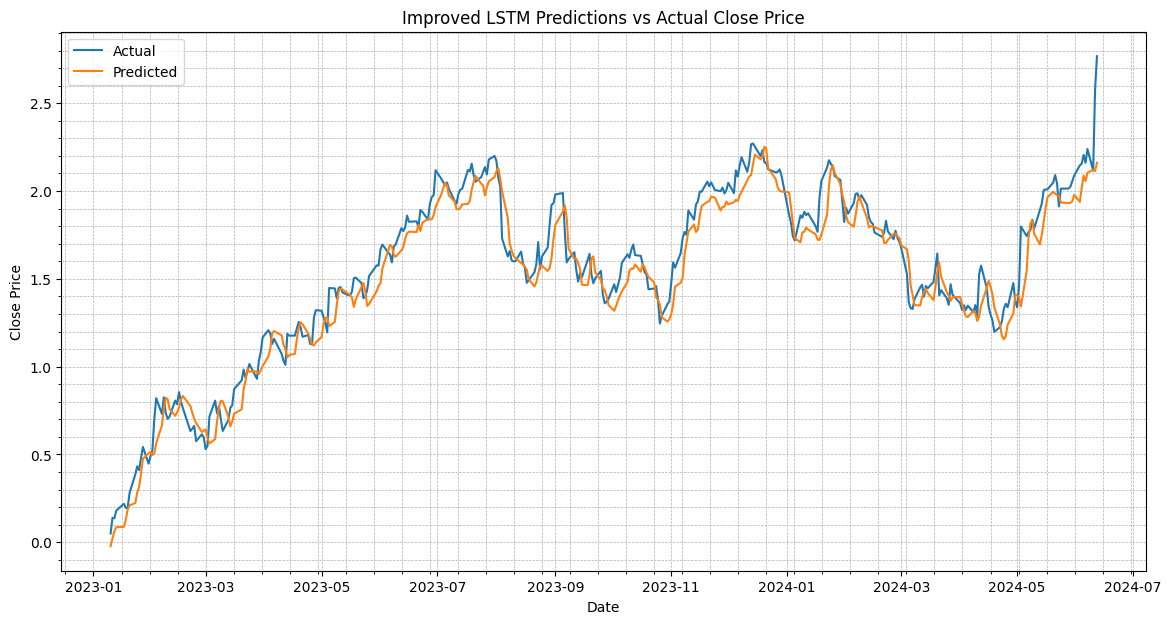

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Improved LSTM Predictions vs Actual Close Price')
plt.legend()
# Enable both major and minor grids
plt.grid(which='both', linestyle='--', linewidth=0.5)
# Turn on minor ticks
plt.minorticks_on()
plt.show()

In [108]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = y_test
y_pred = predictions

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.09198179612840657
Mean Squared Error (MSE): 0.013814452803044606
Root Mean Squared Error (RMSE): 0.11753490036174194
R-squared (R²): 0.9430837160752802


In [37]:
tpredictions = model.predict(X_train)

24/24 [==============================] - 0s 9ms/step


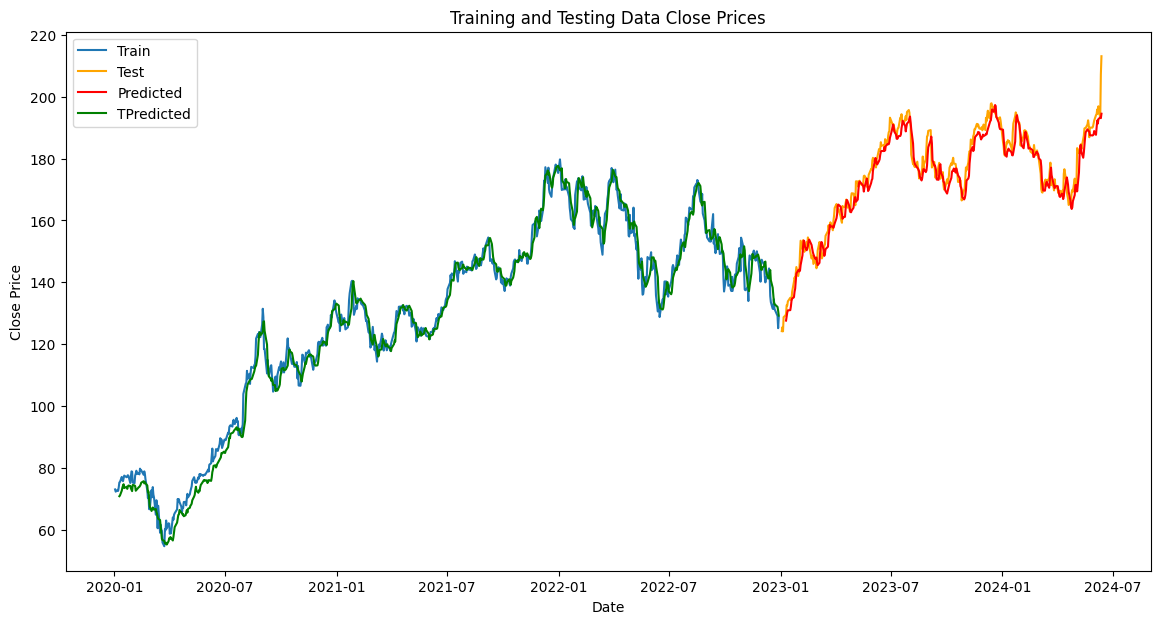

In [38]:
import matplotlib.pyplot as plt
predictions2 = target_scaler.inverse_transform(predictions)
tpredictions2 = target_scaler.inverse_transform(tpredictions)
# Plot the actual close prices for the training and testing periods
plt.figure(figsize=(14, 7))
plt.plot(train_df['date'], train_df['Close'], label='Train')
plt.plot(test_df['date'], test_df['Close'], label='Test', color='orange')
plt.plot(test_dates, predictions2, label='Predicted', color = 'red')
plt.plot(train_df['date'][5:], tpredictions2, label='TPredicted', color = 'green')

# Add labels and a legend to differentiate between the training and testing data
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training and Testing Data Close Prices')
plt.legend()
plt.show()

In [110]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual_values = test_df['Close'][5:]
predicted_values = predictions2.flatten()

y_true = actual_values
y_pred = predicted_values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.8169497535342254
Mean Squared Error (MSE): 12.956513678306761
Root Mean Squared Error (RMSE): 3.59951575608536
R-squared (R²): 0.9430837001785125


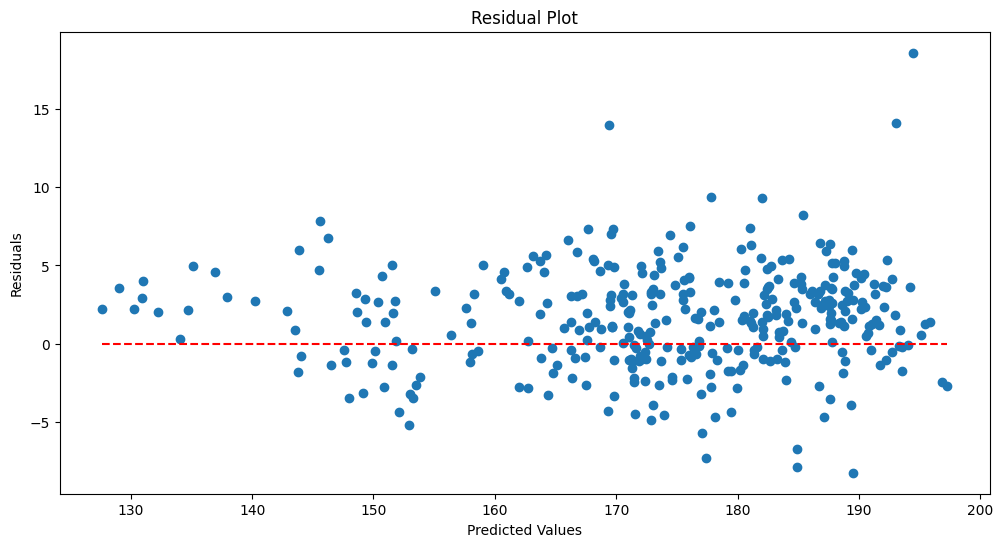

In [112]:
# Residual Plot
residuals = y_true - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [114]:
import seaborn as sns

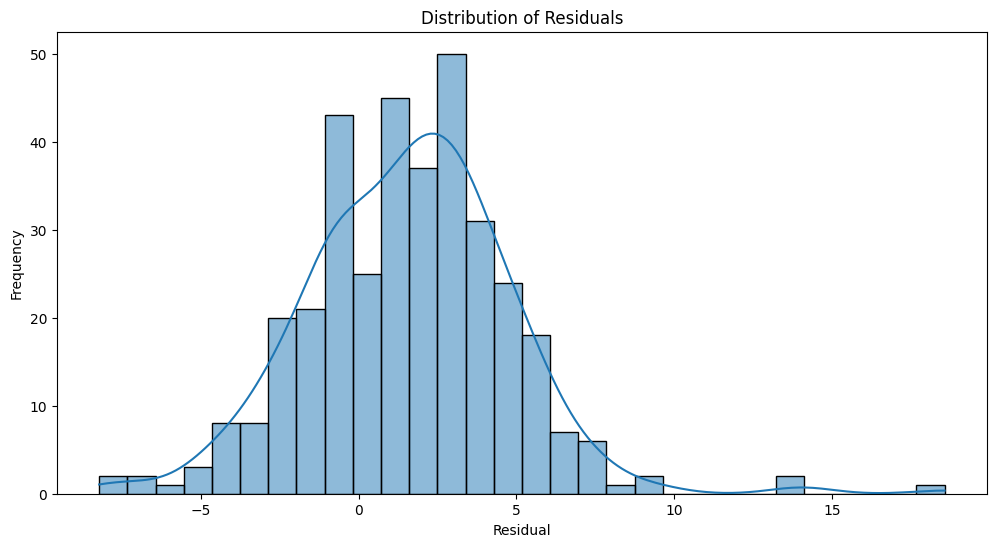

In [115]:
# Distribution Plot of Residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

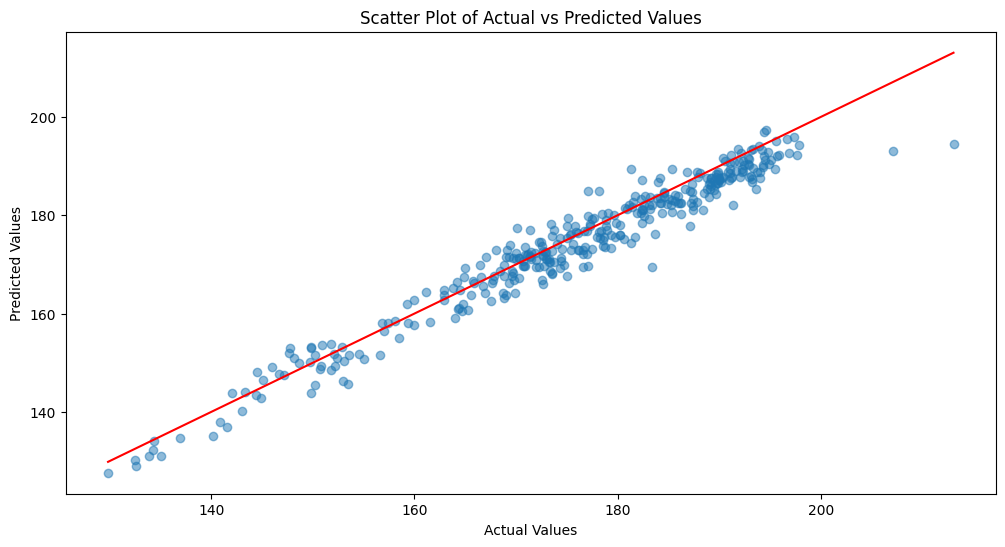

In [117]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Line y=x
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

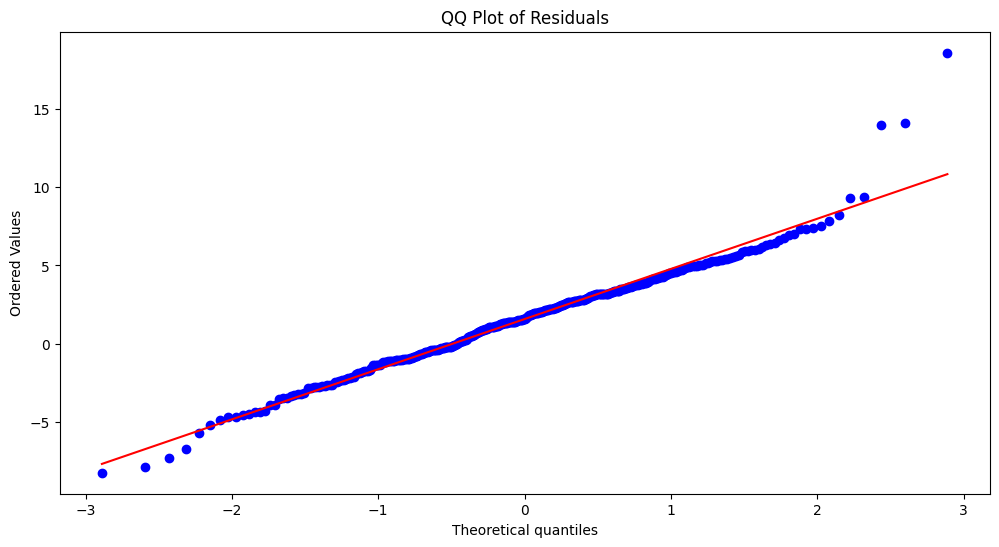

In [118]:
import scipy.stats as stats

# QQ Plot of Residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Trading Algorithm

In [40]:
Testdf = test_df[5:]
Testdf

,date,mean,median,Open,High,Low,Close,Volume
757,2023-01-10,0.056942,0.099989,129.370884,130.364058,127.245491,129.837677,63896200
758,2023-01-11,0.055361,0.099410,130.354126,132.598695,129.569525,132.578842,69458900
759,2023-01-12,0.616388,0.913630,132.966167,133.343563,130.542820,132.499374,71379600
760,2023-01-13,-0.266853,0.099450,131.128773,133.999045,130.761303,133.840134,57809700
761,2023-01-17,0.133213,0.096182,133.909691,136.352892,133.214472,135.012115,63646600
...,...,...,...,...,...,...,...,...
1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800
1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900
1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100
1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300


In [41]:
Testdf['predictions'] = predictions2
Testdf

<ipython-input-41-735d81af893b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testdf['predictions'] = predictions2


,date,mean,median,Open,High,Low,Close,Volume,predictions
757,2023-01-10,0.056942,0.099989,129.370884,130.364058,127.245491,129.837677,63896200,127.621704
758,2023-01-11,0.055361,0.099410,130.354126,132.598695,129.569525,132.578842,69458900,129.003632
759,2023-01-12,0.616388,0.913630,132.966167,133.343563,130.542820,132.499374,71379600,130.261093
760,2023-01-13,-0.266853,0.099450,131.128773,133.999045,130.761303,133.840134,57809700,130.931580
761,2023-01-17,0.133213,0.096182,133.909691,136.352892,133.214472,135.012115,63646600,131.007523
...,...,...,...,...,...,...,...,...,...
1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800,191.296021
1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900,192.753204
1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100,193.267944
1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300,193.045380


In [99]:
df = Testdf.copy()

In [100]:
df

,date,mean,median,Open,High,Low,Close,Volume,predictions
757,2023-01-10,0.056942,0.099989,129.370884,130.364058,127.245491,129.837677,63896200,127.621704
758,2023-01-11,0.055361,0.099410,130.354126,132.598695,129.569525,132.578842,69458900,129.003632
759,2023-01-12,0.616388,0.913630,132.966167,133.343563,130.542820,132.499374,71379600,130.261093
760,2023-01-13,-0.266853,0.099450,131.128773,133.999045,130.761303,133.840134,57809700,130.931580
761,2023-01-17,0.133213,0.096182,133.909691,136.352892,133.214472,135.012115,63646600,131.007523
...,...,...,...,...,...,...,...,...,...
1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800,191.296021
1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900,192.753204
1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100,193.267944
1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300,193.045380


In [101]:
df['pred_pct_change'] = df['predictions'].pct_change()
df['signal'] = np.where(df['pred_pct_change'] > 0, 1, 0)


In [102]:
df = df.reset_index()

In [103]:
df

,index,date,mean,median,Open,High,Low,Close,Volume,predictions,pred_pct_change,signal
0,757,2023-01-10,0.056942,0.099989,129.370884,130.364058,127.245491,129.837677,63896200,127.621704,NaN,0
1,758,2023-01-11,0.055361,0.099410,130.354126,132.598695,129.569525,132.578842,69458900,129.003632,0.010828,1
2,759,2023-01-12,0.616388,0.913630,132.966167,133.343563,130.542820,132.499374,71379600,130.261093,0.009748,1
3,760,2023-01-13,-0.266853,0.099450,131.128773,133.999045,130.761303,133.840134,57809700,130.931580,0.005147,1
4,761,2023-01-17,0.133213,0.096182,133.909691,136.352892,133.214472,135.012115,63646600,131.007523,0.000580,1
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800,191.296021,-0.005009,0
353,1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900,192.753204,0.007617,1
354,1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100,193.267944,0.002670,1
355,1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300,193.045380,-0.001152,0


In [104]:
df['signal2'] = df['signal'].shift(-1)
df

,index,date,mean,median,Open,High,Low,Close,Volume,predictions,pred_pct_change,signal,signal2
0,757,2023-01-10,0.056942,0.099989,129.370884,130.364058,127.245491,129.837677,63896200,127.621704,NaN,0,1.0
1,758,2023-01-11,0.055361,0.099410,130.354126,132.598695,129.569525,132.578842,69458900,129.003632,0.010828,1,1.0
2,759,2023-01-12,0.616388,0.913630,132.966167,133.343563,130.542820,132.499374,71379600,130.261093,0.009748,1,1.0
3,760,2023-01-13,-0.266853,0.099450,131.128773,133.999045,130.761303,133.840134,57809700,130.931580,0.005147,1,1.0
4,761,2023-01-17,0.133213,0.096182,133.909691,136.352892,133.214472,135.012115,63646600,131.007523,0.000580,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1109,2024-06-06,0.077835,0.099967,195.690002,196.500000,194.169998,194.479996,41181800,191.296021,-0.005009,0,1.0
353,1110,2024-06-07,0.401397,0.099997,194.649994,196.940002,194.139999,196.889999,53103900,192.753204,0.007617,1,1.0
354,1111,2024-06-10,0.242893,0.099997,196.899994,197.300003,192.149994,193.119995,97262100,193.267944,0.002670,1,0.0
355,1112,2024-06-11,0.458646,0.952384,193.649994,207.160004,193.630005,207.149994,172373300,193.045380,-0.001152,0,1.0


In [105]:
# Initialize portfolio DataFrame
initial_cash = 100000  # initial cash balance
portfolio = pd.DataFrame(index=df.index)
portfolio['date'] = df['date']
portfolio['cash'] = initial_cash
portfolio['positions'] = 0
portfolio['portfolio_value'] = initial_cash
portfolio['trades'] = 0

# Step 2: Implement trading strategy
for i in range(1, len(df)):
    if df.loc[i, 'signal2'] == 1 and portfolio.loc[i-1, 'positions'] == 0:
        # Buy
        portfolio.loc[i, 'positions'] = portfolio.loc[i-1, 'cash'] / df.loc[i, 'Close']
        portfolio.loc[i, 'cash'] = 0
        portfolio.loc[i, 'trades'] = 1
    elif df.loc[i, 'signal2'] == 0 and portfolio.loc[i-1, 'positions'] > 0:
        # Sell
        portfolio.loc[i, 'cash'] = portfolio.loc[i-1, 'positions'] * df.loc[i, 'Close']
        portfolio.loc[i, 'positions'] = 0
        portfolio.loc[i, 'trades'] = 1
    else:
        # Hold position or stay in cash
        portfolio.loc[i, 'positions'] = portfolio.loc[i-1, 'positions']
        portfolio.loc[i, 'cash'] = portfolio.loc[i-1, 'cash']
        portfolio.loc[i, 'trades'] = 0

    # Update portfolio value
    portfolio.loc[i, 'portfolio_value'] = portfolio.loc[i, 'cash'] + portfolio.loc[i, 'positions'] * df.loc[i, 'Close']

# Step 3: Calculate performance metrics
# Sharpe Ratio
portfolio['strategy_returns'] = portfolio['portfolio_value'].pct_change()
risk_free_rate = 0.01
excess_returns = portfolio['strategy_returns'] - risk_free_rate/252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

# Maximum Drawdown
cumulative_max = portfolio['portfolio_value'].cummax()
drawdown = portfolio['portfolio_value'] / cumulative_max - 1
max_drawdown = drawdown.min()

# Number of trades executed
number_of_trades = portfolio['trades'].sum()

# Win ratio
wins = (portfolio['strategy_returns'].shift(-1) > 0).sum()
losses = (portfolio['strategy_returns'].shift(-1) <= 0).sum()
win_ratio = wins / (wins + losses)

# Display results
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", number_of_trades)
print("Win Ratio:", win_ratio)

# Display portfolio DataFrame
# print(portfolio)

Sharpe Ratio: 1.815120310066719
Maximum Drawdown: -0.08095454001442026
Number of Trades Executed: 97
Win Ratio: 0.3202247191011236


In [106]:
portfolio

,date,cash,positions,portfolio_value,trades,strategy_returns
0,2023-01-10,100000.000000,0.000000,100000.000000,0,NaN
1,2023-01-11,0.000000,754.268165,100000.000000,1,0.000000
2,2023-01-12,0.000000,754.268165,99940.059988,0,-0.000599
3,2023-01-13,0.000000,754.268165,100951.352028,0,0.010119
4,2023-01-17,0.000000,754.268165,101835.340599,0,0.008757
...,...,...,...,...,...,...
352,2024-06-06,0.000000,726.137950,141219.305472,1,0.000000
353,2024-06-07,0.000000,726.137950,142969.300591,0,0.012392
354,2024-06-10,140231.757416,0.000000,140231.757416,1,-0.019148
355,2024-06-11,0.000000,676.957574,140231.757416,1,0.000000


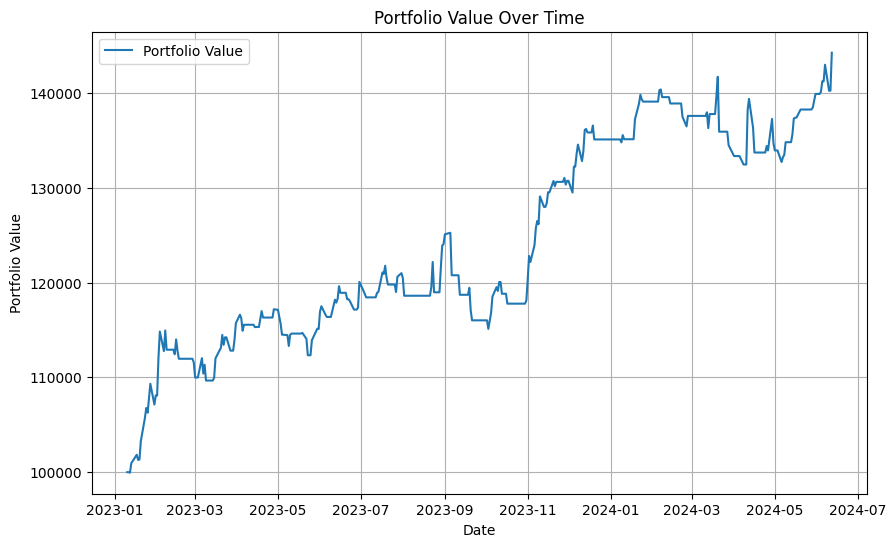

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio['date'], portfolio['portfolio_value'], label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

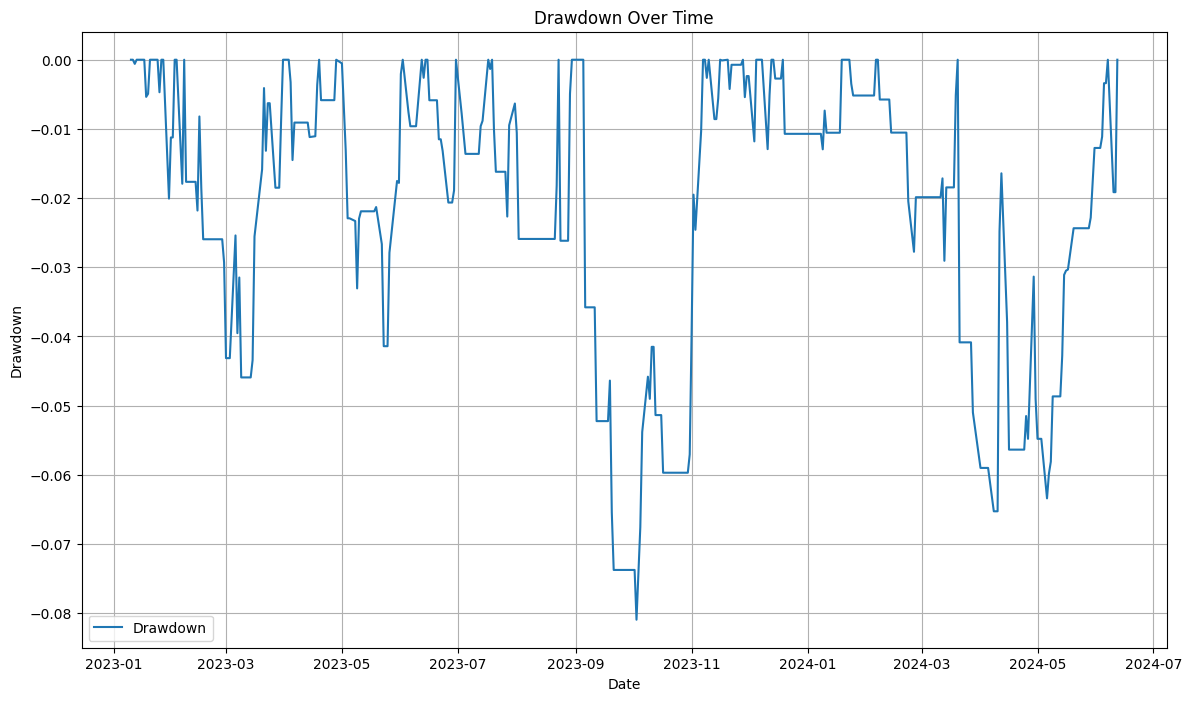

In [97]:
# 3. Drawdowns
plt.figure(figsize=(14, 8))
plt.plot(portfolio['date'], drawdown, label='Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Drawdown Over Time')
plt.legend()
plt.grid(True)
plt.show()

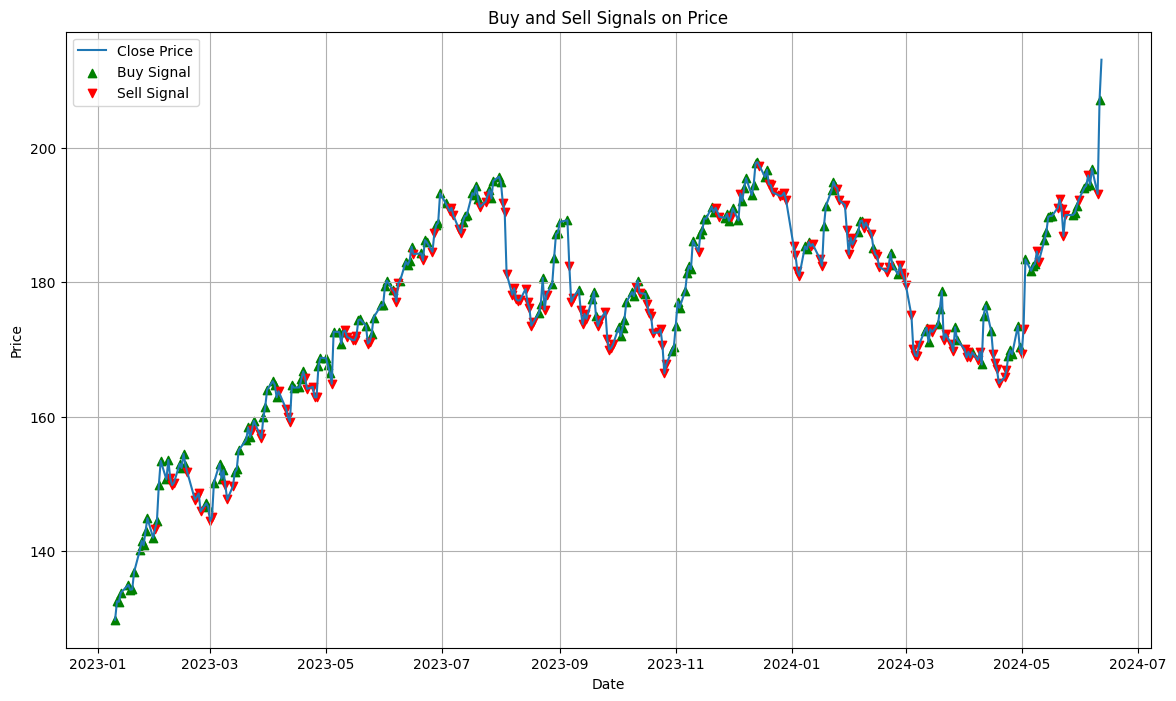

In [98]:
# 4. Buy/Sell Signals
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['Close'], label='Close Price')
buy_signals = df[df['signal2'] == 1]
sell_signals = df[df['signal2'] == 0]
plt.scatter(buy_signals['date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Buy and Sell Signals on Price')
plt.legend()
plt.grid(True)
plt.show()

# Making pipeline for other stocks (doing on AMZN)

In [125]:
def extract_news(ticker):
  p = 1
  data = []
  bar = tqdm(total=11000)

  while True:
      mc_url = f'https://markets.businessinsider.com/news/{ticker.lower()}-stock?p=' + str(p)
      req = Request(url=mc_url, headers={'user-agent': 'my-app'})
      response = urlopen(req)
      html = BeautifulSoup(response, 'html.parser')
      article_divs = html.find_all('div', class_='latest-news__story')
      articles = []

      for div in article_divs:
          title_tag = div.find('a', class_='news-link')
          if title_tag:
              title = title_tag.get_text(strip=True)

          datetime_tag = div.find('time', class_='latest-news__date')
          if datetime_tag:
              datetime = datetime_tag['datetime']

          articles.append({"title": title, "datetime": datetime})

      data += articles
      bar.update(len(articles))

      if len(data) > 12000:
          break

      p += 1

  bar.close()
  news_df = pd.DataFrame(data)
  news_df['datetime'] = pd.to_datetime(news_df['datetime'])
  news_df['date'] = news_df['datetime'].dt.date
  news_df.drop('datetime', axis = 1, inplace = True)
  return news_df

In [194]:
def extract_data(ticker):
  import yfinance as yf
  stock_df = yf.Ticker(ticker.upper())
  stock_df = stock_df.history(start="2020-01-01")
  stock_df['date'] = stock_df.index.date
  stock_df.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
  stock_df.reset_index(drop=True, inplace=True)
  return stock_df

In [137]:
def extract_sentiment_and_score(title):
    result = nlp(title)[0]
    return pd.Series({'sentiment': result['label'], 'score': result['score']})

def get_sentiment(news_df):
  news_df[['sentiment', 'score']] = news_df['title'].progress_apply(extract_sentiment_and_score)
  sentiment_mapping = {'Positive': 1, 'Neutral': 0.1, 'Negative': -1}
  news_df['sentiment_numeric'] = news_df['sentiment'].map(sentiment_mapping)
  news_df['feature']= news_df['sentiment_numeric'] * news_df['score']
  new_df = news_df[['date', 'feature']]
  grouped_df = new_df.groupby('date')['feature'].agg(['mean', 'median'])
  grouped_df.reset_index(inplace=True)
  # grouped_df = grouped_df[grouped_df['date'] >= '2020-01-01']
  return grouped_df


In [129]:
def join_dfs(stock_df, grouped_df):
  stock_df['date'] = pd.to_datetime(stock_df['date'])
  grouped_df['date'] = pd.to_datetime(grouped_df['date'])
  merged_df = pd.merge(grouped_df, stock_df, on='date', how='inner')
  return merged_df

In [130]:
# Function to create sequences
def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [ ]:
amzn_news_df = extract_news('amzn')

In [195]:
amzn_stock_df = extract_data('amzn')

In [138]:
amzngdf = get_sentiment(amzn_news_df)

100%|██████████| 12050/12050 [27:38<00:00,  7.27it/s]


In [196]:
amzngdf['date'] = pd.to_datetime(amzngdf['date'])
amzngdf = amzngdf[amzngdf['date'] >= '2020-01-01']

In [197]:
amzngdf

,date,mean,median
0,2020-03-18,-0.184877,0.090816
1,2020-03-19,-0.130233,0.099549
2,2020-03-20,0.275153,0.099955
3,2020-03-21,-0.079083,0.099877
4,2020-03-22,0.068550,0.099871
...,...,...,...
1452,2024-06-14,0.410762,0.099980
1453,2024-06-15,0.099983,0.099983
1454,2024-06-17,0.605055,0.842275
1455,2024-06-18,0.477987,0.995754


In [198]:
merged_df = join_dfs(amzn_stock_df, amzngdf)

In [199]:
merged_df

,date,mean,median,Open,High,Low,Close,Volume
0,2020-03-18,-0.184877,0.090816,87.500000,92.083000,87.250000,91.500000,192904000
1,2020-03-19,-0.130233,0.099549,93.000000,97.250000,91.632500,94.046501,207998000
2,2020-03-20,0.275153,0.099955,96.315498,97.849998,91.036499,92.304497,196358000
3,2020-03-23,0.013621,0.099976,91.387497,95.970001,90.599998,95.141502,156170000
4,2020-03-24,-0.147937,0.097457,97.574997,97.750000,95.016998,97.004997,142942000
...,...,...,...,...,...,...,...,...
1064,2024-06-12,0.209570,0.099986,188.020004,188.350006,185.429993,186.889999,33984200
1065,2024-06-13,0.496830,0.735203,186.089996,187.669998,182.669998,183.830002,39721500
1066,2024-06-14,0.410762,0.099980,183.080002,183.720001,182.229996,183.660004,25456400
1067,2024-06-17,0.605055,0.842275,182.520004,185.000000,181.220001,184.059998,35601900


In [200]:
df = merged_df.copy()
df.head()

,date,mean,median,Open,High,Low,Close,Volume
0,2020-03-18,-0.184877,0.090816,87.500000,92.083000,87.250000,91.500000,192904000
1,2020-03-19,-0.130233,0.099549,93.000000,97.250000,91.632500,94.046501,207998000
2,2020-03-20,0.275153,0.099955,96.315498,97.849998,91.036499,92.304497,196358000
3,2020-03-23,0.013621,0.099976,91.387497,95.970001,90.599998,95.141502,156170000
4,2020-03-24,-0.147937,0.097457,97.574997,97.750000,95.016998,97.004997,142942000


In [201]:
# Split data into training and testing sets
train_df = df[df['date'] < '2023-01-01']
test_df = df[df['date'] >= '2023-01-01']

# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'mean','median']
target = 'Close'

# Extract feature data
train_data = train_df[features]
test_data = test_df[features]

In [203]:
# Normalize the data using the training data scaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Normalize the target using the training target scaler
target_scaler = StandardScaler()
train_target = target_scaler.fit_transform(train_df[[target]])
test_target = target_scaler.transform(test_df[[target]])

In [204]:
sequence_length = 5  # Adjust as needed
X_train, y_train = create_sequences(train_data, train_target, sequence_length)
X_test, y_test = create_sequences(test_data, test_target, sequence_length)

# Ensure the test dates are aligned with y_test
test_dates = test_df['date'].iloc[sequence_length:].reset_index(drop=True)

In [205]:


from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))  # Regression output

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [206]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
18/18 [==============================] - 14s 202ms/step - loss: 0.1498 - val_loss: 0.1289
Epoch 2/50
18/18 [==============================] - 1s 43ms/step - loss: 0.0577 - val_loss: 0.0771
Epoch 3/50
18/18 [==============================] - 1s 41ms/step - loss: 0.0479 - val_loss: 0.0997
Epoch 4/50
18/18 [==============================] - 1s 42ms/step - loss: 0.0449 - val_loss: 0.1197
Epoch 5/50
18/18 [==============================] - 1s 54ms/step - loss: 0.0401 - val_loss: 0.0924
Epoch 6/50
18/18 [==============================] - 1s 59ms/step - loss: 0.0442 - val_loss: 0.0965
Epoch 7/50
18/18 [==============================] - 1s 44ms/step - loss: 0.0434 - val_loss: 0.1262
Epoch 8/50
18/18 [==============================] - 1s 34ms/step - loss: 0.0402 - val_loss: 0.1035
Epoch 9/50
18/18 [==============================] - 1s 36ms/step - loss: 0.0372 - val_loss: 0.0886
Epoch 10/50
18/18 [==============================] - 1s 36ms/step - loss: 0.0349 - val_loss: 0.0983
Epoch 1

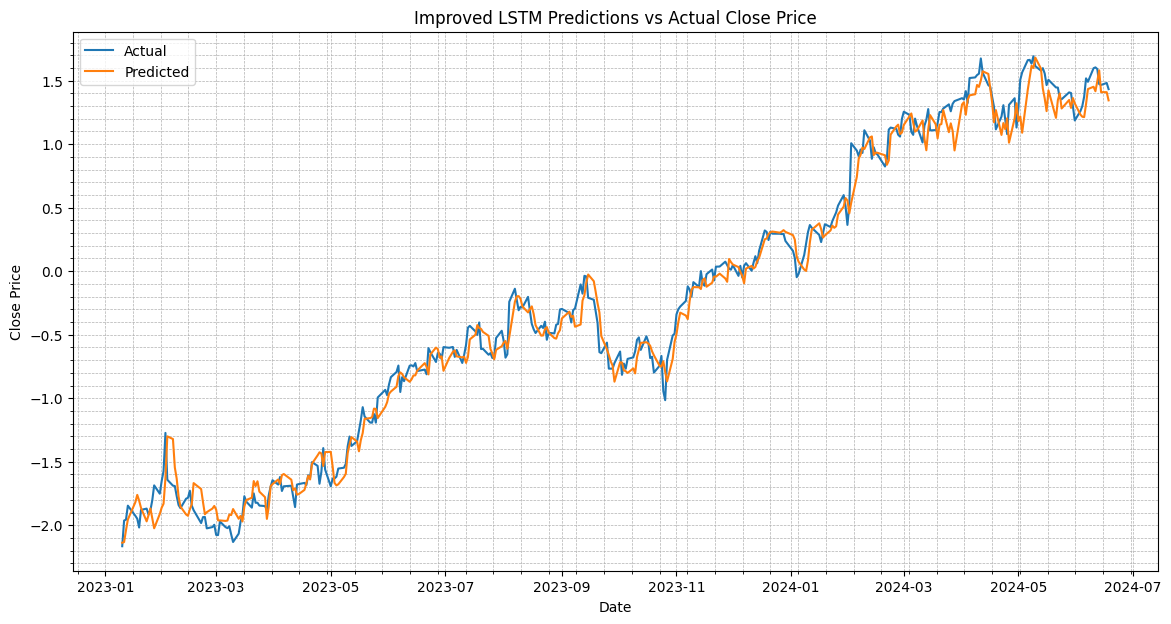

In [207]:
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Improved LSTM Predictions vs Actual Close Price')
plt.legend()
# Enable both major and minor grids
plt.grid(which='both', linestyle='--', linewidth=0.5)
# Turn on minor ticks
plt.minorticks_on()
plt.show()

22/22 [==============================] - 0s 13ms/step


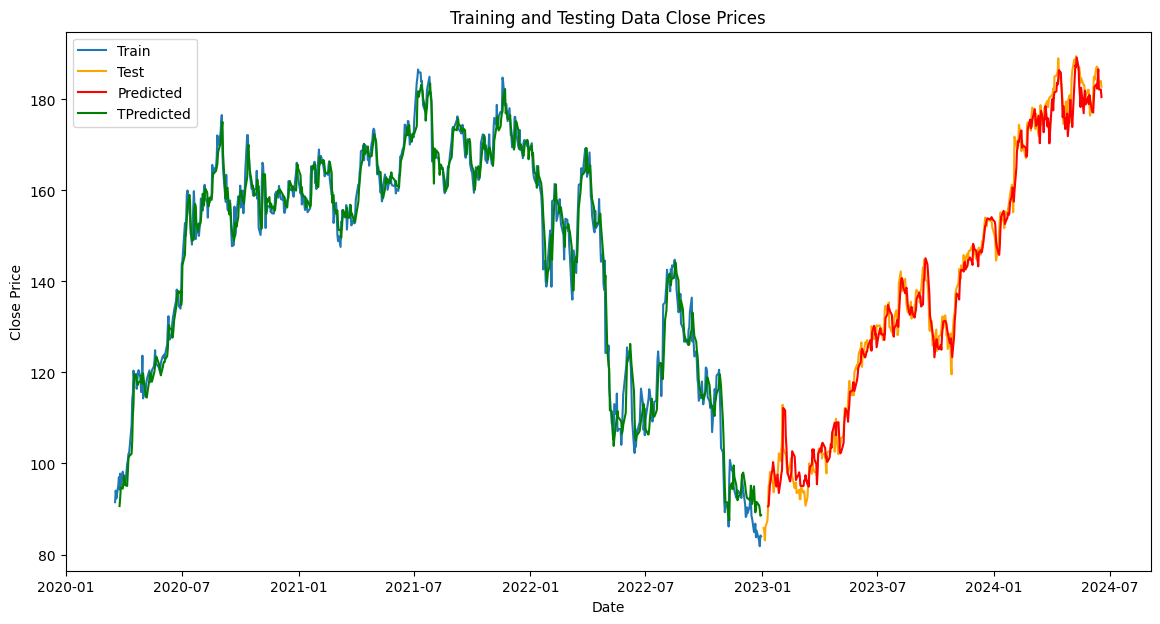

In [208]:
tpredictions = model.predict(X_train)
import matplotlib.pyplot as plt
predictions2 = target_scaler.inverse_transform(predictions)
tpredictions2 = target_scaler.inverse_transform(tpredictions)
# Plot the actual close prices for the training and testing periods
plt.figure(figsize=(14, 7))
plt.plot(train_df['date'], train_df['Close'], label='Train')
plt.plot(test_df['date'], test_df['Close'], label='Test', color='orange')
plt.plot(test_dates, predictions2, label='Predicted', color = 'red')
plt.plot(train_df['date'][5:], tpredictions2, label='TPredicted', color = 'green')

# Add labels and a legend to differentiate between the training and testing data
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training and Testing Data Close Prices')
plt.legend()
plt.show()

In [211]:
Testdf = test_df[5:]
Testdf

,date,mean,median,Open,High,Low,Close,Volume
707,2023-01-10,0.188002,0.099884,87.570000,90.190002,87.290001,89.870003,67756600
708,2023-01-11,0.206174,0.099083,90.930000,95.260002,90.930000,95.089996,103126200
709,2023-01-12,0.594402,0.764979,96.930000,97.190002,93.500000,95.269997,85254800
710,2023-01-13,-0.066791,0.099538,94.180000,98.370003,94.120003,98.120003,85549400
711,2023-01-17,-0.259588,-0.328768,98.680000,98.889999,95.730003,96.050003,72755000
...,...,...,...,...,...,...,...,...
1064,2024-06-12,0.209570,0.099986,188.020004,188.350006,185.429993,186.889999,33984200
1065,2024-06-13,0.496830,0.735203,186.089996,187.669998,182.669998,183.830002,39721500
1066,2024-06-14,0.410762,0.099980,183.080002,183.720001,182.229996,183.660004,25456400
1067,2024-06-17,0.605055,0.842275,182.520004,185.000000,181.220001,184.059998,35601900


In [213]:
Testdf['predictions'] = predictions2

<ipython-input-213-69b333416085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testdf['predictions'] = predictions2


In [214]:
df = Testdf.copy()
df['pred_pct_change'] = df['predictions'].pct_change()
df['signal'] = np.where(df['pred_pct_change'] > 0, 1, 0)
df = df.reset_index()
df['signal2'] = df['signal'].shift(-1)
df

,index,date,mean,median,Open,High,Low,Close,Volume,predictions,pred_pct_change,signal,signal2
0,707,2023-01-10,0.188002,0.099884,87.570000,90.190002,87.290001,89.870003,67756600,90.585327,NaN,0,1.0
1,708,2023-01-11,0.206174,0.099083,90.930000,95.260002,90.930000,95.089996,103126200,90.717842,0.001463,1,1.0
2,709,2023-01-12,0.594402,0.764979,96.930000,97.190002,93.500000,95.269997,85254800,93.111519,0.026386,1,1.0
3,710,2023-01-13,-0.066791,0.099538,94.180000,98.370003,94.120003,98.120003,85549400,95.299622,0.023500,1,1.0
4,711,2023-01-17,-0.259588,-0.328768,98.680000,98.889999,95.730003,96.050003,72755000,98.821495,0.036956,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1064,2024-06-12,0.209570,0.099986,188.020004,188.350006,185.429993,186.889999,33984200,184.416260,0.011154,1,1.0
358,1065,2024-06-13,0.496830,0.735203,186.089996,187.669998,182.669998,183.830002,39721500,186.625137,0.011978,1,0.0
359,1066,2024-06-14,0.410762,0.099980,183.080002,183.720001,182.229996,183.660004,25456400,182.195465,-0.023736,0,0.0
360,1067,2024-06-17,0.605055,0.842275,182.520004,185.000000,181.220001,184.059998,35601900,182.189438,-0.000033,0,0.0


In [215]:
# Initialize portfolio DataFrame
initial_cash = 100000  # initial cash balance
portfolio = pd.DataFrame(index=df.index)
portfolio['date'] = df['date']
portfolio['cash'] = initial_cash
portfolio['positions'] = 0
portfolio['portfolio_value'] = initial_cash
portfolio['trades'] = 0

# Step 2: Implement trading strategy
for i in range(1, len(df)):
    if df.loc[i, 'signal2'] == 1 and portfolio.loc[i-1, 'positions'] == 0:
        # Buy
        portfolio.loc[i, 'positions'] = portfolio.loc[i-1, 'cash'] / df.loc[i, 'Close']
        portfolio.loc[i, 'cash'] = 0
        portfolio.loc[i, 'trades'] = 1
    elif df.loc[i, 'signal2'] == 0 and portfolio.loc[i-1, 'positions'] > 0:
        # Sell
        portfolio.loc[i, 'cash'] = portfolio.loc[i-1, 'positions'] * df.loc[i, 'Close']
        portfolio.loc[i, 'positions'] = 0
        portfolio.loc[i, 'trades'] = 1
    else:
        # Hold position or stay in cash
        portfolio.loc[i, 'positions'] = portfolio.loc[i-1, 'positions']
        portfolio.loc[i, 'cash'] = portfolio.loc[i-1, 'cash']
        portfolio.loc[i, 'trades'] = 0

    # Update portfolio value
    portfolio.loc[i, 'portfolio_value'] = portfolio.loc[i, 'cash'] + portfolio.loc[i, 'positions'] * df.loc[i, 'Close']

# Step 3: Calculate performance metrics
# Sharpe Ratio
portfolio['strategy_returns'] = portfolio['portfolio_value'].pct_change()
risk_free_rate = 0.01
excess_returns = portfolio['strategy_returns'] - risk_free_rate/252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

# Maximum Drawdown
cumulative_max = portfolio['portfolio_value'].cummax()
drawdown = portfolio['portfolio_value'] / cumulative_max - 1
max_drawdown = drawdown.min()

# Number of trades executed
number_of_trades = portfolio['trades'].sum()

# Win ratio
wins = (portfolio['strategy_returns'].shift(-1) > 0).sum()
losses = (portfolio['strategy_returns'].shift(-1) <= 0).sum()
win_ratio = wins / (wins + losses)

# Display results
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", number_of_trades)
print("Win Ratio:", win_ratio)

# Display portfolio DataFrame
# print(portfolio)

Sharpe Ratio: 0.7717728180062308
Maximum Drawdown: -0.13498904003683887
Number of Trades Executed: 146
Win Ratio: 0.3185595567867036


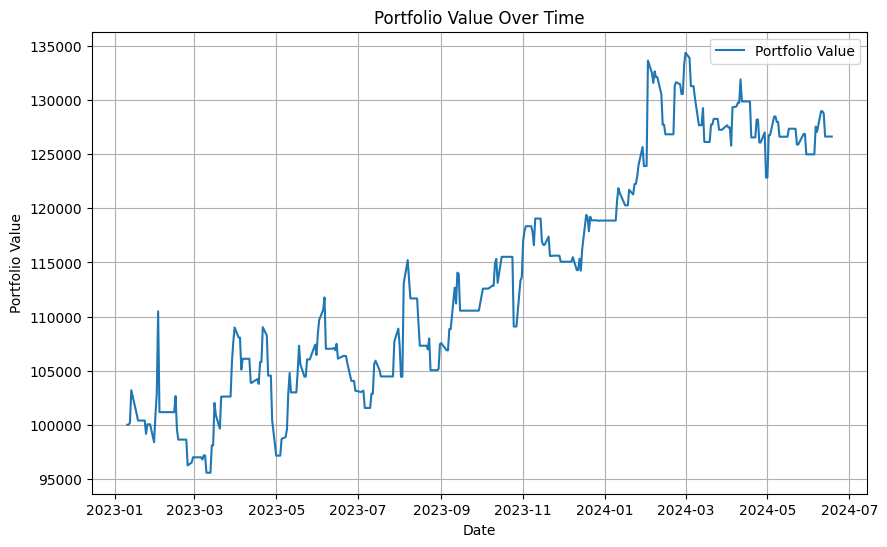

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio['date'], portfolio['portfolio_value'], label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.show()